In [4]:
from google.oauth2.service_account import Credentials
import pandas as pd

In [22]:
project_id = 'energytransition-final-project'
dataset_id = 'energycharts'
table_id = f'{dataset_id}.energy_districts_table_fixed'
path = '/Users/mirage/Downloads/energytransition-final-project-8e815779515d.json'
credentials = Credentials.from_service_account_file(path)
query = (f'SELECT * FROM {table_id}')

df= pd.read_gbq(query=query,project_id=project_id,credentials=credentials)

In [23]:
df

,district,state,population,pop_density,area_size,total_ren_cap,solar_cap,solar_users,wind_cap,lat,...,sunshine_minutes_yest,wind_speed_yest,daytime_minutes,cloud_minutes,sunshine_minutes,wind_speed,consumption_per_capita_in_kWh,Total_Area_Kreis_km2,AreaKreis_minus_PotWind_km2,PotWind_area_km2
0,St. Wendel,Saarland,86170,181,476.48,356697.0,153493.94,5277,191150.6,49.522319,...,NaN,NaN,NaN,NaN,NaN,NaN,1430.0,NaN,NaN,NaN
1,Neunkirchen,Saarland,130847,524,249.80,175548.0,91900.32,5801,74960.0,49.408735,...,NaN,NaN,NaN,NaN,NaN,NaN,1365.0,NaN,NaN,NaN
2,Saarpfalz-Kreis,Saarland,140960,337,418.28,167052.0,108640.05,7158,16000.6,49.371796,...,NaN,NaN,NaN,NaN,NaN,NaN,1450.0,420.9412,388.5499,32.39130
3,Saarlouis,Saarland,193661,422,459.35,222588.0,139358.14,10103,51560.0,49.384231,...,NaN,NaN,NaN,NaN,NaN,NaN,1455.0,460.3033,431.4732,28.83014
4,Saarbrücken,Saarland,327284,796,410.95,261208.0,166463.80,9182,27760.0,49.322948,...,NaN,NaN,NaN,NaN,NaN,NaN,1350.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,Bad Tölz-Wolfratshausen,Bayern,127919,116,1102.66,261257.0,92241.92,7106,9.9,47.747974,...,42.0,2.51,699.0,657.0,42.0,1.63,1210.0,1119.1040,1016.0830,103.02050
382,Miesbach,Bayern,99978,115,866.21,155575.0,71241.86,5900,7.5,47.673215,...,55.0,2.51,699.0,699.0,0.0,1.43,1275.0,858.6886,805.1397,53.54889
383,Waldshut,Baden-Württemberg,171249,151,1131.17,2226566.0,189228.30,13353,20.3,47.574945,...,0.0,2.51,699.0,336.0,363.0,1.80,1280.0,1122.4360,1021.1590,101.27700
384,Bodenseekreis,Baden-Württemberg,218885,329,664.75,232756.0,196947.74,14055,0.0,47.676249,...,0.0,2.51,699.0,175.0,524.0,1.96,1205.0,669.0274,566.0668,102.96060


In [24]:
df_numeric = df.select_dtypes(include=["float" , "int"])

In [126]:
columns_to_keep = ['district' , 'state' ,'population', 'pop_density', 'area_size' ]
df_keep_state =df.loc[: , columns_to_keep]

In [57]:
df_keep_state

,district,state,population,pop_density,area_size
0,St. Wendel,Saarland,86170,181,476.48
1,Neunkirchen,Saarland,130847,524,249.80
2,Saarpfalz-Kreis,Saarland,140960,337,418.28
3,Saarlouis,Saarland,193661,422,459.35
4,Saarbrücken,Saarland,327284,796,410.95
...,...,...,...,...,...
381,Bad Tölz-Wolfratshausen,Bayern,127919,116,1102.66
382,Miesbach,Bayern,99978,115,866.21
383,Waldshut,Baden-Württemberg,171249,151,1131.17
384,Bodenseekreis,Baden-Württemberg,218885,329,664.75


In [129]:
columns_to_keep = [ 'state' ,'population', 'pop_density', 'area_size' ]
df_keep =df.loc[: , columns_to_keep]

In [130]:
df_keep

,state,population,pop_density,area_size
0,Saarland,86170,181,476.48
1,Saarland,130847,524,249.80
2,Saarland,140960,337,418.28
3,Saarland,193661,422,459.35
4,Saarland,327284,796,410.95
...,...,...,...,...
381,Bayern,127919,116,1102.66
382,Bayern,99978,115,866.21
383,Baden-Württemberg,171249,151,1131.17
384,Baden-Württemberg,218885,329,664.75


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [131]:
from sklearn.preprocessing import OneHotEncoder

In [132]:
encoder = OneHotEncoder()
encoder.fit(df_keep[['state']])
encoder.transform(df_keep[['state']])

<386x16 sparse matrix of type '<class 'numpy.float64'>'
	with 386 stored elements in Compressed Sparse Row format>

In [142]:
grouped_df = df_keep.groupby("state" , as_index=False)[["population", "pop_density", "area_size"]].sum()
grouped_df

,state,population,pop_density,area_size
0,Baden-Württemberg,11124642,24146,35673.23
1,Bayern,13176989,28713,68368.54
2,Berlin,3677472,4127,891.12
3,Brandenburg,2537868,3344,29654.40
4,Bremen,676463,2887,419.37
5,Hamburg,1853935,2455,755.09
6,Hessen,6295017,17386,20788.70
7,Mecklenburg-Vorpommern,1611160,2241,23293.82
8,Niedersachsen,8027031,13514,46582.60
9,Nordrhein-Westfalen,17924591,56764,34112.49


In [146]:
encoder = OneHotEncoder()

# Fit and transform the encoder on the "state" column
encoded_data = encoder.fit_transform(grouped_df[['state']])

# Convert the encoded data to an array or DataFrame
encoded_data_array = encoded_data.toarray()

# Optionally, convert the array to a DataFrame
df_enc = pd.DataFrame(encoded_data_array, columns=encoder.get_feature_names_out(['state']))


In [147]:
df_enc


,state_Baden-Württemberg,state_Bayern,state_Berlin,state_Brandenburg,state_Bremen,state_Hamburg,state_Hessen,state_Mecklenburg-Vorpommern,state_Niedersachsen,state_Nordrhein-Westfalen,state_Rheinland-Pfalz,state_Saarland,state_Sachsen,state_Sachsen-Anhalt,state_Schleswig-Holstein,state_Thüringen
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


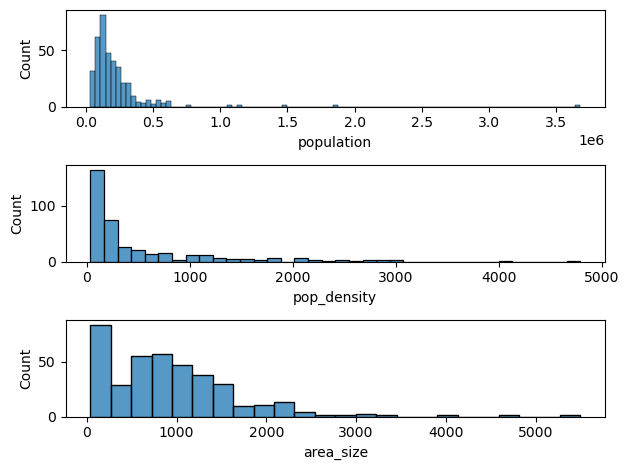

In [36]:
fig, axs = plt.subplots(3)

var_list = ["population", "pop_density", "area_size"]

# Convert var_list to a numpy array before reshaping
var_array = np.array(var_list)

# Loop directly through the axs object and assign titles from the list
for row_axes, row_titles in zip(axs, var_array.reshape(3)):
    sns.histplot(x=df[row_titles], ax=row_axes)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [38]:
import plotly.express as px
fig =px.scatter_3d(df ,
              x="population", 
              y="pop_density", 
              z="area_size", 
              opacity=0.7,
                    width=500,
                    height=500
           )
fig.show()

In [156]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_enc_scaled = pd.DataFrame(scaler.fit_transform(df_enc) , columns=df_enc.columns)

df_keep_scaled

,state_Baden-Württemberg,state_Bayern,state_Berlin,state_Brandenburg,state_Bremen,state_Hamburg,state_Hessen,state_Mecklenburg-Vorpommern,state_Niedersachsen,state_Nordrhein-Westfalen,state_Rheinland-Pfalz,state_Saarland,state_Sachsen,state_Sachsen-Anhalt,state_Schleswig-Holstein,state_Thüringen
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
from sklearn.cluster import KMeans

In [159]:
nb_clusters_to_try = np.arange(1, 21, 1)
nb_clusters_to_try
inertias = []
for k in nb_clusters_to_try:
    kmean = KMeans(n_clusters=k , n_init='auto')
    kmean.fit(df_enc_scaled)
    inertias.append(kmean.inertia_)

    print(inertias)

[15.0]
[15.0, 14.0]
[15.0, 14.0, 13.0]
[15.0, 14.0, 13.0, 12.0]
[15.0, 14.0, 13.0, 12.0, 11.0]
[15.0, 14.0, 13.0, 12.0, 11.0, 10.0]
[15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0]
[15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0]
[15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0]
[15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0]
[15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.000000000000001]
[15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.000000000000001, 4.000000000000001]
[15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.000000000000001, 4.000000000000001, 3.0]
[15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.000000000000001, 4.000000000000001, 3.0, 2.0]
[15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.000000000000001, 4.000000000000001, 3.0, 2.0, 1.0]
[15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.000000000000001, 4.000000000000001, 3.0, 2.0, 1.0, 0.0]


ValueError: n_samples=16 should be >= n_clusters=17.

In [160]:
fig = px.line(y=inertias,
              x=range(1, len(inertias) + 1),
              labels={'x': 'nb centroids', 'y':'Inertia'},
              title="Elbow method")
fig.show()

In [186]:
from sklearn.cluster import KMeans
df_cluster = 6
KMeans = KMeans(n_clusters=df_cluster , n_init='auto' , max_iter=300)
KMeans.fit(df_enc_scaled)
labelling = KMeans.labels_


In [193]:
grouped_df["label"] = pd.Series(labelling)
grouped_df

,state,population,pop_density,area_size,label
0,Baden-Württemberg,11124642,24146,35673.23,0
1,Bayern,13176989,28713,68368.54,0
2,Berlin,3677472,4127,891.12,0
3,Brandenburg,2537868,3344,29654.40,0
4,Bremen,676463,2887,419.37,0
5,Hamburg,1853935,2455,755.09,2
6,Hessen,6295017,17386,20788.70,0
7,Mecklenburg-Vorpommern,1611160,2241,23293.82,5
8,Niedersachsen,8027031,13514,46582.60,4
9,Nordrhein-Westfalen,17924591,56764,34112.49,3


In [194]:
grouped_df["label"].value_counts()

label
0    11
2     1
5     1
4     1
3     1
1     1
Name: count, dtype: int64

In [99]:
df_keep_state[df_keep_state[ "label"]==6].head(50)

,district,state,population,pop_density,area_size,label
0,St. Wendel,Saarland,86170,181,476.48,6
1,Neunkirchen,Saarland,130847,524,249.80,6
2,Saarpfalz-Kreis,Saarland,140960,337,418.28,6
3,Saarlouis,Saarland,193661,422,459.35,6
5,Merzig-Wadern,Saarland,103426,186,555.63,6
12,Plön,Schleswig-Holstein,129687,120,1083.57,6
20,Steinburg,Schleswig-Holstein,130843,124,1055.70,6
21,Stormarn,Schleswig-Holstein,245406,320,766.24,6
26,Wittmund,Niedersachsen,57455,87,656.84,6
29,Friesland,Niedersachsen,98971,162,609.53,6
